# Analyzing Global Air Pollution by Key Pollutants

## Overview
This project investigates global air pollution across multiple countries by merging and cleaning three large datasets. We focused on the major pollutants, they are **PM2.5**, **PM10**, **NO2**, and **CO** and to understand how they contribute to overall air quality and which dominate in different regions.  
Our final visualisation is a **horizontal stacked bar chart** that displays both **percentage composition of each pollutant** and each country’s **total pollution level (µg/m³)**, enabling clear proportional and absolute comparisons.

## Datasets
* **Dataset 1: 23k Global Air Pollution Data** 
  - Contains **CO**, **NO2**, and **PM2.5** readings.  
  - PM10 missing, useful for trend analysis.
  - https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

* **Dataset 2: 10k Global Air Quality Dataset**  
  - Includes **PM10** and other pollutants.  
  - Used to fill PM10 gaps from Dataset 1.
  - www.kaggle.com/datasets/waqi786/global-air-quality-dataset

* **Dataset 3: WHO Air Quality Data (32k rows)**  
  - Used for validation and correction (xlxs file converted to csv).  
  - Ensures consistent and reliable pollutant measurements globally.
  - https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database/2022

Combining these datasets gave us a more complete picture of global air pollution.

## Data Processing
To merge datasets with different formats and units:

* Standardised column names and pollutant labels.  
* Converted units where needed for consistency.  
* Filled missing pollutant values using **country-level means**, supported by WHO references.  
* Aggregated all data at the **country level**.  
* Computed:  
  - **Total pollution** (µg/m³)  
  - **Percentage contributions** of PM2.5, PM10, NO2, and CO  
* Combined all datasets into a single, clean analytical dataset.

This ensured **completeness and comparability** across countries.

## Visualisation

### Exploratory Graphs

Before the final chart, we explored the data to understand distributions, relationships, and variability.

#### 1. Correlation Heatmap
We examined correlations between PM2.5, PM10, and NO2:

* **PM10 and NO2**: moderate correlation (0.53), suggesting co-occurrence in dust-heavy and industrial/traffic-heavy regions.  
* **PM2.5**: weakly correlated with PM10 (0.19) and NO2 (0.15), reflecting its long-range transport and secondary formation.

The heatmap highlighted shared sources and helped plan the separation of pollutants in the stacked bar chart.

#### 2. Histograms + KDE Curves
We plotted **histograms with kernel density estimates**:

* **PM2.5:** Most countries have low to moderate levels; industrialized nations show high outliers.  
* **PM10:** Right-skewed distribution, extreme in dust-prone regions.  
* **NO2:** Many countries are low, but urbanized nations have higher concentrations.

These plots revealed overall distributions and identified which pollutants dominate different countries.

#### 3. Boxplots Comparing Pollutants
Boxplots (log scale) illustrated variability and outliers:

* **PM10**: widest spread, extreme peaks in dust-heavy areas.  
* **PM2.5**: moderate variability, higher in industrialized countries.  
* **NO2**: generally low, spikes in traffic-dense countries.

This guided color choices, axis scaling, and label formatting for the final interactive chart.

## Final Interactive Visualization: Interactive Global Air Pollution by Key Pollutants

Our final visualisation is an **interactive horizontal stacked bar chart** using **Plotly**, chosen because it:

* Handles long country names cleanly along the y-axis.  
* Shows **relative composition** (PM10, PM2.5, NO2 percentages) and **total pollution** (µg/m³).  
* Highlights the **top 20 most polluted countries**, focusing the comparison.

### Design Choices

* **Monochromatic blue palette**: PM10 in dark blue, PM2.5 in medium blue, NO2 in light blue for clarity.  
* **Orange dashed line with markers**: represents **total pollution**, shown on a secondary x-axis.  
* **Percentage labels**: displayed only when above 1% to reduce clutter.  
* **Stacked horizontal bars**: show each country’s pollution “signature” and dominant pollutant.

### Interactivity (Plotly)

* **Hover tooltips** show percentage and absolute µg/m³ for each pollutant.  
* Hovering over orange markers reveals **total pollution**.  
* **Sort buttons** allow dynamic reordering by:  
  - Total pollution  
  - PM10  
  - PM2.5  
  - NO2  
* Clicking a button automatically updates the order, percentages, and tooltips for clarity.

These features let users **explore which countries are worst overall, or dominated by specific pollutants**, beyond a static chart.

## Tools & Libraries
* **Python:** Pandas, NumPy for cleaning and aggregation  
* **Visualisation:** Matplotlib, Plotly  
* **Environment:** Jupyter Notebook / Google Colab  

Used for efficiently handling **60,000+ records** and creating meaningful visual insights.

## Notes
* Pollution units: **µg/m³**.  
* **CO excluded from the stacked bar chart** because:   
  - CO mainly poses **acute short-term risks**, not chronic pollution.  
  - Including CO would clutter the chart without useful cross-country insight.  
* Focus remains on pollutants linked to **chronic exposure**: PM2.5, PM10, and NO2.

**************************

# STEP 1 : Dataset Loading & Initial Inspection


- Imported core libraries for data handling and visualisation (pandas, numpy, matplotlib, seaborn).

- Loaded three CSV datasets from local storage into DataFrame objects (dataset1, dataset2, dataset3).

- Printed dataset dimensions using .shape to understand data size and structure.

- Displayed first 5 rows of each dataset using .head() for quick feature and consistency check.

- Enabled initial assessment of pollutant indicators, metadata, and climate variables before preprocessing or modelling.



In [45]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset1 = pd.read_csv(r"C:\Users\achal\Downloads\DMV\23k global air pollution dataset.csv")
dataset2 = pd.read_csv(r"C:\Users\achal\Downloads\DMV\10k global_air_quality_data_10000.csv")
dataset3 = pd.read_csv(r"C:\Users\achal\Downloads\DMV\32k who_aap_2021_v9_11august2022.csv")
print("Dataset1 shape:", dataset1.shape)
print(dataset1.head(), "\n")
print("Dataset2 shape:", dataset2.shape)
print(dataset2.head(), "\n")
print("Dataset3 shape:", dataset3.shape)
print(dataset3.head(), "\n")

Dataset1 shape: (23463, 12)
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Catego

********************************

# STEP 2: Data Standardisation & AQI to Concentration Mapping

Pollutant columns were unified to a common naming format, and Dataset 1 AQI values for PM2.5 and NO₂ were converted into real concentration units (µg/m³) using EPA breakpoint-based formulas.
Dataset 3 (WHO) was structurally aligned by renaming country, city, and pollutant concentration fields to ensure seamless integration for global analysis and modelling.

In [46]:
# Step2
dataset1.rename(columns={
    'PM2.5 AQI Value': 'PM2.5',
    'NO2 AQI Value': 'NO2',
    'Ozone AQI Value': 'O3'
}, inplace=True)

# PM2.5 AQI to µg/m³
def pm25_aqi_to_ugm3(aqi):
    if aqi <= 50:
        return aqi * 12 / 50
    elif aqi <= 100:
        return 12 + (aqi-50)*(35.4-12)/50
    elif aqi <= 150:
        return 35.5 + (aqi-100)*(55.4-35.5)/50
    elif aqi <= 200:
        return 55.5 + (aqi-150)*(150.4-55.5)/50
    elif aqi <= 300:
        return 150.5 + (aqi-200)*(250.4-150.5)/100
    elif aqi <= 400:
        return 250.5 + (aqi-300)*(350.4-250.5)/100
    elif aqi <= 500:
        return 350.5 + (aqi-400)*(500.4-350.5)/100
    else:
        return np.nan

# NO2 AQI to µg/m³
def no2_aqi_to_ugm3(aqi):
    return aqi * 400 / 500

dataset1['PM2.5'] = dataset1['PM2.5'].apply(pm25_aqi_to_ugm3)
dataset1['NO2'] = dataset1['NO2'].apply(no2_aqi_to_ugm3)

# Dataset2 already has PM2.5, PM10, NO2, O3, so no change

# Dataset3: rename columns to match
dataset3.rename(columns={
    'WHO Country Name': 'Country',
    'City or Locality': 'City',
    'PM2.5 (μg/m3)': 'PM2.5',
    'PM10 (μg/m3)': 'PM10',
    'NO2 (μg/m3)': 'NO2'
}, inplace=True)

*****************************

# STEP 3: Feature Selection for Analysis

Reduced each dataset to essential fields focusing on location and pollutants: Dataset 1 to NO₂ & PM2.5, Dataset 2 to NO₂, PM2.5 & PM10, and Dataset 3 (WHO) to PM2.5, PM10 & NO₂, keeping formats consistent for merging and downstream modelling.

In [47]:
# step 3
dataset1 = dataset1[['Country', 'City', 'NO2', 'PM2.5']]  
dataset2 = dataset2[['Country', 'City', 'NO2', 'PM2.5', 'PM10']]  
dataset3 = dataset3[['Country', 'City', 'PM2.5', 'PM10', 'NO2']]  

**************************************

# STEP 4 : Missing Value Imputation

- Created a country-level mean imputation function to replace missing pollutant values.

- Used groupby('Country') + transform() to preserve row structure while filling NaNs.

- Computed mean separately per pollutant in each dataset.

- Filled Dataset 1 to (NO₂, PM2.5), Dataset 2 to (NO₂, PM2.5, PM10), Dataset 3 to (PM2.5, PM10, NO₂) using respective country averages.

- Ensured complete pollutant coverage per country for consistent global analysis.

In [48]:
#step 4 - fill missing values per country
def fill_country_mean(df, pollutants):
    for pollutant in pollutants:
        df[pollutant] = df.groupby('Country')[pollutant].transform(lambda x: x.fillna(x.mean()))
    return df
pollutants1 = ['NO2', 'PM2.5']          
pollutants2 = ['NO2', 'PM2.5', 'PM10']  
pollutants3 = ['PM2.5', 'PM10', 'NO2']  
dataset1 = fill_country_mean(dataset1, pollutants1)
dataset2 = fill_country_mean(dataset2, pollutants2)
dataset3 = fill_country_mean(dataset3, pollutants3)

********************************

# STEP 5 : Country-Level Pollutant Aggregation

- Defined an aggregation function to compute mean pollutant levels per country.

- Applied groupby('Country') + .mean() to summarize national trends.

- Generated:
  country1 to (NO₂, PM2.5),
  country2 to (NO₂, PM2.5, PM10),
  country3 to (PM2.5, PM10, NO₂) for final comparison/merging.

In [49]:
# step 5 : mean of each pollutant per country
def aggregate_country(df, pollutants):
    return df.groupby('Country')[pollutants].mean().reset_index()

country1 = aggregate_country(dataset1, pollutants1)
country2 = aggregate_country(dataset2, pollutants2)
country3 = aggregate_country(dataset3, pollutants3)

********************************

# STEP 6 : Country Dataset Merging 

- Merged country1 & country2 on Country using outer join, with pollutant suffixes _d1, _d2.

- Integrated country3 (WHO aggregated data) to the merged frame, retaining aligned pollutants.

- Verified final column schema using .columns .

- Resulting fields contain pollutants from:
Dataset1 (AQI to µg/m³) to _d1,
Dataset2 (raw concentrations) to _d2,
Dataset3 (WHO national means) to no suffix / _d3 where conflict occurs.

- Outer merging preserved all countries even if missing in individual sources, ready for final analysis.

In [50]:
# Step 6 - Merge 
merged = country1.merge(country2, on='Country', how='outer', suffixes=('_d1', '_d2'))
merged = merged.merge(country3, on='Country', how='outer', suffixes=('', '_d3'))
print(merged.columns)

Index(['Country', 'NO2_d1', 'PM2.5_d1', 'NO2_d2', 'PM2.5_d2', 'PM10', 'PM2.5',
       'PM10_d3', 'NO2'],
      dtype='object')


***********************************

# STEP 7 : Final Pollutant Computation & Cleaning

- Averaged pollutant values across datasets to compute final NO₂, PM2.5, and PM10 concentrations.

- Retained only the final clean schema (Country, NO2, PM2.5, PM10) for downstream use.

- Treated 0 in PM10 as missing by replacing with NaN to avoid incorrect averages.

- Filled PM10 gaps using country-level mean imputation with row-level structure preserved.

- Applied a global mean fallback for countries.

In [51]:
# Step 7 - final pollutant values (averaging across datasets)
merged['NO2'] = merged[['NO2_d1','NO2_d2','NO2']].mean(axis=1)
merged['PM2.5'] = merged[['PM2.5_d1','PM2.5_d2','PM2.5']].mean(axis=1)
merged['PM10'] = merged[['PM10','PM10_d3']].mean(axis=1)
# Only final columns
merged_final = merged[['Country','NO2','PM2.5','PM10']].copy()
# Fill missing PM10 values
merged_final['PM10'] = merged_final['PM10'].replace(0, np.nan)  # treat 0 as missing
merged_final['PM10'] = merged_final.groupby('Country')['PM10'].transform(lambda x: x.fillna(x.mean()))  # country-level mean
merged_final['PM10'] = merged_final['PM10'].fillna(merged_final['PM10'].mean())  # fallback to global mean

**************************

# STEP 8 : Total Pollution Score & Pollutant Contribution 

- Handled residual missing values for PM2.5 and NO₂ by replacing them with the global mean to ensure completeness.

- Computed a Total pollution index per country by summing PM2.5, PM10, and NO₂ concentration values (µg/m³).

- Derived percentage contributions of each pollutant relative to Total to capture national pollution signatures.

- Verified data integrity : the dataset now contains 185 countries with zero missing values across all selected pollutants.

- Identified pollution burden extremes : Total ranges from  approx 17.45 µg/m³ to 430.63 µg/m³, with PM10 contributing the highest share globally ( approx 62.36% avg).

In [52]:
# STEP 8 - Calculate Total Pollution and Pollutant Percentages

#  missing values in NO2 and PM2.5 by filling them with the global average
merged_final['NO2'] = merged_final['NO2'].fillna(merged_final['NO2'].mean())
merged_final['PM2.5'] = merged_final['PM2.5'].fillna(merged_final['PM2.5'].mean())

# total pollution for each country by summing PM10, PM2.5, and NO2
merged_final['Total'] = merged_final[['NO2', 'PM2.5', 'PM10']].sum(axis=1)

# percentage of the total each pollutant contributes
merged_final['NO2_percent'] = merged_final['NO2'] / merged_final['Total'] * 100
merged_final['PM2.5_percent'] = merged_final['PM2.5'] / merged_final['Total'] * 100
merged_final['PM10_percent'] = merged_final['PM10'] / merged_final['Total'] * 100

# Top 20 countries with the highest total pollution
top20 = merged_final[['Country','PM2.5','PM10','NO2','Total','PM2.5_percent','PM10_percent','NO2_percent']] \
         .sort_values(by='Total', ascending=False).head(20)
print("Top 20 countries by total pollution:")
print(top20)

# Missing Values double check
print("\nRemaining missing values in the dataset:")
print(merged_final.isna().sum())

# pollutant values summary
print("\nSummary statistics for pollutant concentrations (µg/m³):")
print(merged_final[['PM2.5','PM10','NO2','Total']].describe())

#  percentage contributions Summary 
print("\nSummary statistics for pollutant percentage contributions:")
print(merged_final[['PM2.5_percent','PM10_percent','NO2_percent']].describe())


Top 20 countries by total pollution:
                  Country       PM2.5        PM10        NO2       Total  \
116              Pakistan   84.122586  333.542500  12.963301  430.628387   
126     Republic of Korea  198.129755   43.927083  54.891562  296.948401   
11                Bahrain   90.764778  166.228571  27.012500  284.005849   
47                  Egypt   55.642725  164.992686  26.057716  246.693127   
177                   UAE   80.013692  103.891192  52.683038  236.587923   
102              Mongolia   43.994917  169.220000  23.200000  236.414917   
175                Russia   77.878610  105.936286  52.029876  235.844772   
178                    UK   77.614908  103.843804  52.334581  233.793292   
179                   USA   77.113680  104.288035  52.303326  233.705042   
176           South Korea   74.802471  104.997222  51.881801  231.681494   
72                   Iraq   41.073857  161.646250  27.220643  229.940750   
82                 Kuwait   63.242500  131.506909  

*************************

*********************************

# **Exploratory graphs**

### Exploratory Graph 1: Correlation Heatmap

To understand how the three pollutants relate to each other across countries, we created a correlation heatmap using PM2.5, PM10 and NO₂. This helps reveal whether pollutants tend to increase together and may share common sources.

The correlation matrix shows:
- PM2.5 and PM10 have a moderate positive correlation of approximately 0.50.
- PM2.5 and NO₂ also have a moderate positive correlation of approximately 0.51.
- PM10 and NO₂ have a weaker correlation of about 0.26.

These results suggest that countries with high PM2.5 levels often also experience elevated PM10 and NO₂, while the link between PM10 and NO₂ is less consistent. This exploratory graph was included to provide an initial structural view of the relationships between pollutants before moving on to more detailed distribution and composition analyses.


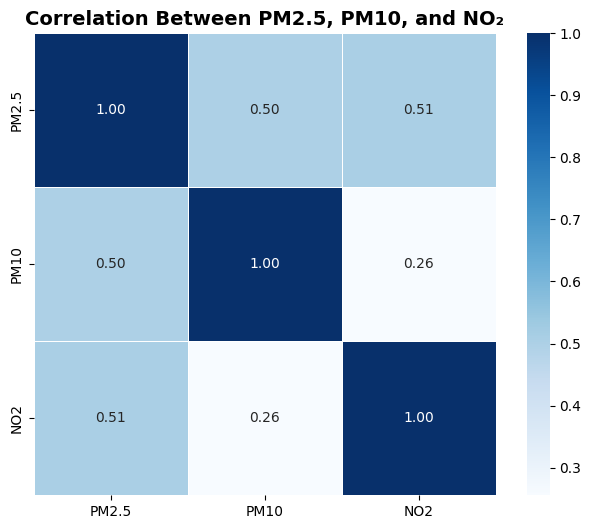

In [53]:
# 1. CORRELATION HEATMAP
pollutants_corr = merged_final[['PM2.5', 'PM10', 'NO2']]
corr_matrix = pollutants_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title('Correlation Between PM2.5, PM10, and NO₂', fontsize=14, fontweight='bold')
plt.show()

*********

## 2. Exploratory Graph 2: Histograms with KDE Curves and Summary Statistics

We created histograms with KDE curves for PM2.5, PM10, and NO2 to explore their distributions across countries.

**Observations:**
- **PM2.5:** Most countries have moderate PM2.5 concentrations, but there is a long tail of countries with very high levels. This right-skewed distribution highlights global variability in fine particulate pollution.
- **PM10:** The distribution is more spread out with some extremely high values, indicating that a few countries experience very high coarse particulate pollution while most remain at moderate levels.
- **NO2:** Most countries have low NO2 levels, but a small number exhibit significantly higher concentrations. This reflects urbanized or industrialized regions where combustion-related emissions are prominent.

**Why we did this:**
- To understand the **overall spread, central tendencies, and presence of outliers** in pollutant levels globally.  
- KDE curves help visualize **density and likelihood of certain concentration ranges**, which complements the histogram counts.

**Insights from the shapes:**
- PM2.5 and PM10 show right-skewed distributions, suggesting that extreme pollution events are concentrated in a few countries.  
- NO2 is concentrated at lower levels, reflecting that traffic and industrial emissions are high only in specific urbanized regions.

**Limitations:**
- Country names are not labeled, so we cannot link specific values to particular countries from this graph alone.  
- These plots serve as **exploratory tools** to identify patterns and guide deeper analysis with labeled data in subsequent visualizations.


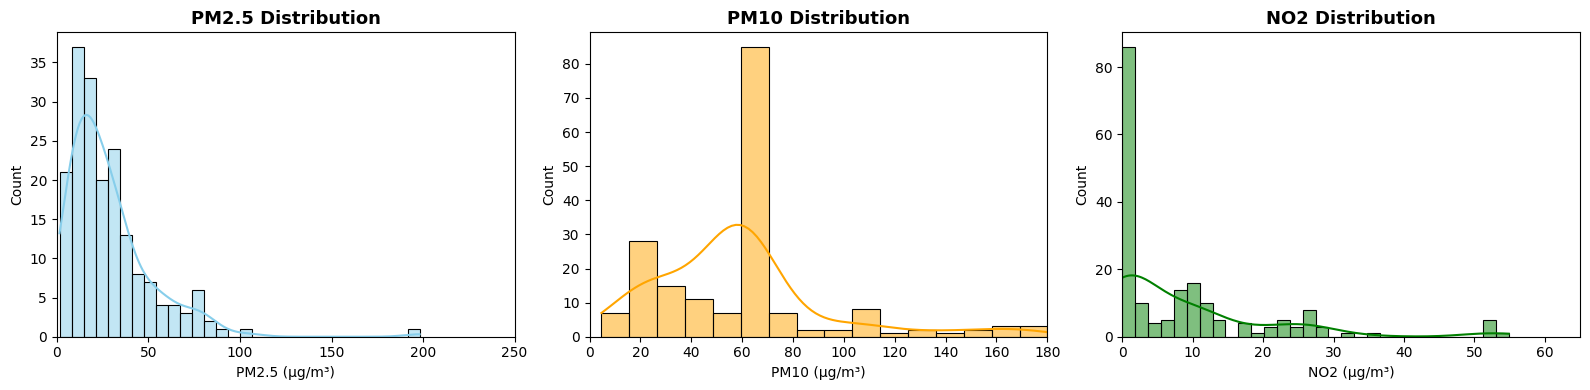

In [54]:
# 2. HISTOGRAMS + KDE CURVES
plt.figure(figsize=(16,4))

# PM2.5
plt.subplot(1, 3, 1)
sns.histplot(merged_final['PM2.5'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('PM2.5 Distribution', fontsize=13, fontweight='bold')
plt.xlabel('PM2.5 (µg/m³)')
plt.xlim(0, 250)

# PM10
plt.subplot(1, 3, 2)
sns.histplot(merged_final['PM10'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('PM10 Distribution', fontsize=13, fontweight='bold')
plt.xlabel('PM10 (µg/m³)')
plt.xlim(0, 180)

# NO2
plt.subplot(1, 3, 3)
sns.histplot(merged_final['NO2'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('NO2 Distribution', fontsize=13, fontweight='bold')
plt.xlabel('NO2 (µg/m³)')
plt.xlim(0, 65)

plt.tight_layout()
plt.show()

***************************

## 3. Exploratory Graph 3: Boxplot of Pollutants Across Countries

We created a boxplot comparing PM2.5, PM10, and NO2 concentrations across countries to explore variability and outliers.

**Observations:**
- **PM2.5:** Shows moderate concentrations for most countries with a few extreme outliers. The log scale helps highlight differences across countries while preserving visibility of smaller values.
- **PM10:** Exhibits a wider spread and more pronounced high-value outliers, indicating that some countries experience very high coarse particulate pollution.
- **NO2:** Concentrations are generally low for most countries, but a few countries have significantly higher levels, reflecting regions with dense traffic or industrial activity.

**Why we did this:**
- To examine **the range, central tendency, and presence of extreme values** for each pollutant.  
- Using a **logarithmic scale** emphasizes differences across countries, making extreme values and overall variability clearer.

**Insights from the boxplot:**
- Both PM2.5 and PM10 distributions are right-skewed, highlighting that extreme pollution events are concentrated in specific countries.  
- NO2’s distribution shows that urban or industrialized areas dominate higher values, while most countries remain at low to moderate levels.

**Limitations:**
- Country names are not labeled, so the boxplot provides a **general overview of global pollutant variability** rather than country-specific insights.  
- This exploratory analysis complements histograms and correlation plots, guiding deeper investigation with fully labeled, interactive visualizations later.


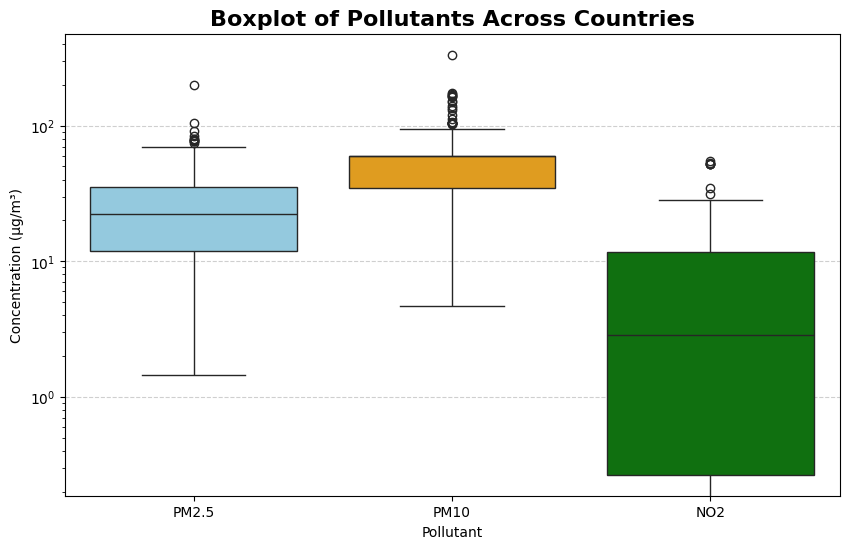

In [55]:
# 3. BOXPLOT COMPARING POLLUTANTS

pollutants_df = merged_final[['PM2.5', 'PM10', 'NO2']]
plt.figure(figsize=(10,6))
sns.boxplot(data=pollutants_df, palette=['skyblue', 'orange', 'green'], showfliers=True)
plt.title('Boxplot of Pollutants Across Countries', fontsize=16, fontweight='bold')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Pollutant')
plt.yscale('log') 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

*************************************

# Final Visualization: Global Air Pollution by Key Pollutants

Our final visualization is an **interactive horizontal stacked bar chart** created with **Plotly**, designed to explore and communicate global air pollution patterns across countries. This chart highlights the relative contributions of **PM10**, **PM2.5**, and **NO2** to total pollution, while also showing overall pollution levels per country.

### Purpose and Goals
The main objectives of this visualization are:
1. **Compare pollutant composition** across countries in a single, intuitive view.
2. **Highlight total pollution levels** while maintaining visibility of individual pollutants.
3. Enable **interactive exploration** of countries and pollutants for deeper analysis.

### How the Graph Works
- Each **bar represents a country**, stacked horizontally to show the proportion of each pollutant (**PM10**, **PM2.5**, **NO2**) as a percentage of the total.
- **Hovering over a segment** reveals the absolute pollutant value in µg/m³ for that segment.
- A **dashed orange line** overlays the bars, representing the **total pollution** for each country in absolute terms.
- **Sorting buttons** allow users to reorganize countries by total pollution or by any individual pollutant (PM10, PM2.5, NO2), making it easy to explore patterns and outliers.

### Design Choices
- **Color Palette:** Monochromatic blues for particulate matter (PM10 dark blue, PM2.5 medium blue) and a lighter contrasting blue for NO2. The orange line emphasizes total pollution. This ensures clarity while maintaining a professional and readable look.
- **Horizontal Orientation:** Full country names are visible without overlap, and stacked bars are easier to compare across multiple countries.
- **Percentage Labels:** Displayed only if greater than 1%, reducing visual clutter while giving precise information where it matters.
- **Interactivity:** Hover information, clickable sort buttons, and dynamic ordering provide a hands-on experience for users to explore the data.

### Data Processing
- Calculated **total pollution** per country: Total = PM10 + PM2.5 + NO2.
- Computed **percent contributions** for each pollutant:
  - PM10_percent = PM10 / Total * 100
  - PM2.5_percent = PM2.5 / Total * 100
  - NO2_percent = NO2 / Total * 100
- Selected the **top 20 countries by total pollution** to focus on the most critical regions globally.
- Ensured percentages and absolute values were correctly aligned for hover displays.

### Insights and Observations
From the interactive graph, we can see:
- **PM10 dominates** in dust-heavy or industrial regions such as Pakistan, Uganda, Mongolia, Iraq, Ghana, and Qatar, often contributing over 70% of total pollution.
- **PM2.5 is higher** in industrialized/urbanized countries like Republic of Korea, USA, Russia, and South Korea, reflecting combustion sources and dense populations.
- **NO2 contributes significantly** in traffic-heavy nations, such as the UAE, UK, and South Korea, highlighting the impact of fossil fuel and vehicular emissions.
- Sorting by total pollution or individual pollutants immediately shows which countries are outliers for a specific pollutant.
- Hover functionality allows precise reading of **both percentage and absolute values**, enhancing interpretability for policy, research, or educational purposes.

### Why We Chose This Visualization
- Horizontal stacked bars effectively communicate **both magnitude and composition** simultaneously.
- Overlaying total pollution preserves context without sacrificing the clarity of individual pollutant contributions.
- Interactivity enables users to explore the data **dynamically**, making the visualization both informative and engaging.

### Takeaways
This visualization provides a **comprehensive, interactive view of global air pollution**, showing not only which countries are most polluted but also how pollution composition differs regionally. It serves as a tool for researchers, policymakers, and educators to **identify pollution patterns, prioritize interventions, and communicate findings clearly**.


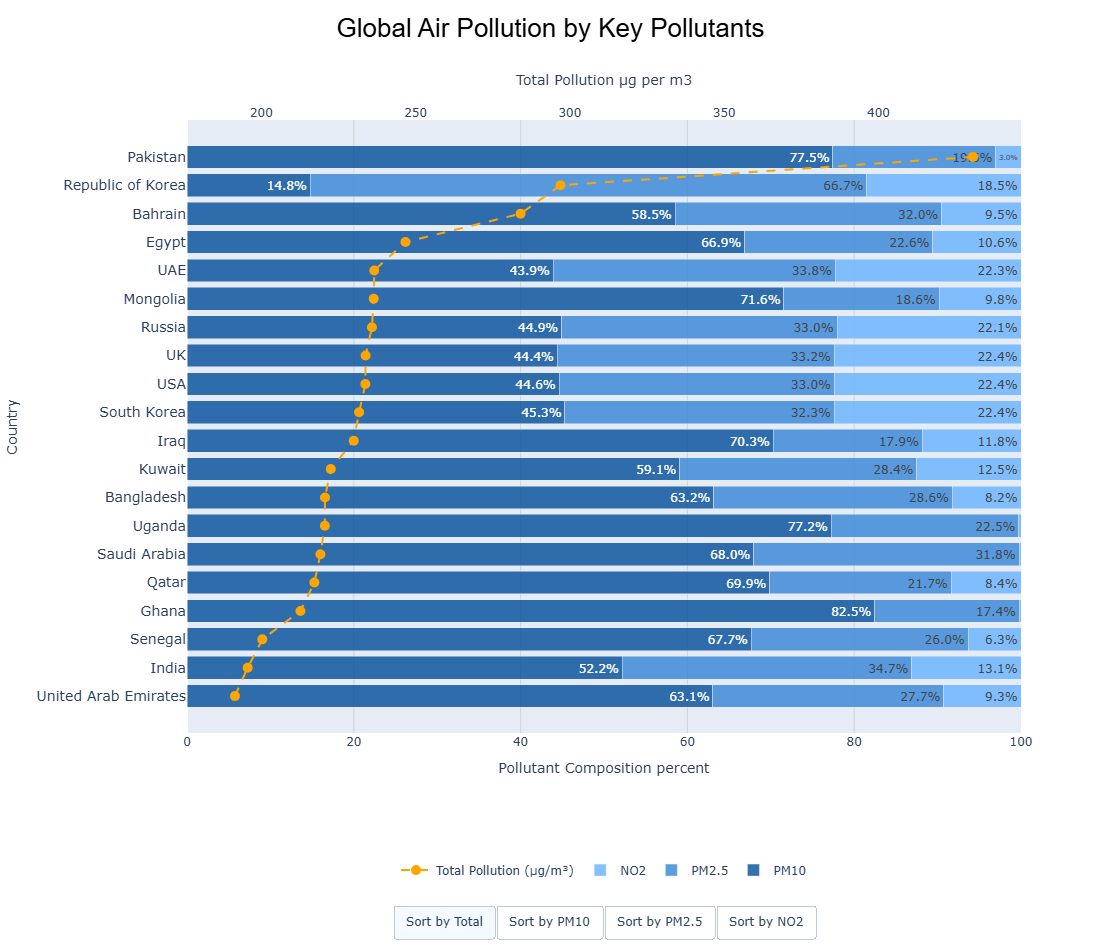

In [61]:
import plotly.graph_objects as go
import pandas as pd

merged_final['Total'] = merged_final['PM10'] + merged_final['PM2.5'] + merged_final['NO2']
merged_final['PM10_percent'] = merged_final['PM10'] / merged_final['Total'] * 100
merged_final['PM2.5_percent'] = merged_final['PM2.5'] / merged_final['Total'] * 100
merged_final['NO2_percent'] = merged_final['NO2'] / merged_final['Total'] * 100

# Top 20 countries initially by Total
top_countries = merged_final.sort_values(by='Total', ascending=False).head(20).reset_index(drop=True)

MONO_COLORS = {
    'PM10_percent': 'rgba(0, 76, 153, 0.8)',
    'PM2.5_percent': 'rgba(51, 133, 214, 0.8)',
    'NO2_percent': 'rgba(102, 178, 255, 0.8)'
}
TOTAL_COLOR = 'orange'
def create_traces(df):
    traces = []
    for pollutant in ['PM10_percent', 'PM2.5_percent', 'NO2_percent']:
        traces.append(go.Bar(
            x=df[pollutant],
            y=df['Country'],
            name=pollutant.replace('_percent', ''),
            orientation='h',
            marker=dict(color=MONO_COLORS[pollutant]),
            text=[f"{v:.1f}%" if v>1 else "" for v in df[pollutant]], 
            textposition='inside',
            hovertemplate=(
                "<b>%{y}</b><br>" +
                pollutant.replace('_percent', '') + ": %{customdata:.1f} µg/m³<extra></extra>"
            ),
            customdata=(df[pollutant] * df['Total'] / 100)  
        ))
    # Pollution line
    traces.append(go.Scatter(
        x=df['Total'],
        y=df['Country'],
        mode='markers+lines',
        name='Total Pollution (µg/m³)',
        marker=dict(color=TOTAL_COLOR, size=10),
        line=dict(color=TOTAL_COLOR, width=2, dash='dash'),
        hovertemplate="<b>%{y}</b><br>Total: %{x:.1f} µg/m³<extra></extra>",
        xaxis='x2'
    ))
    return traces

fig = go.Figure(data=create_traces(top_countries.sort_values(by='Total', ascending=False)))

# Buttons
buttons = []
for col in ['Total', 'PM10', 'PM2.5', 'NO2']:
    sorted_df = top_countries.sort_values(by=col, ascending=False).reset_index(drop=True)
    sorted_df['PM10_percent'] = sorted_df['PM10'] / sorted_df['Total'] * 100
    sorted_df['PM2.5_percent'] = sorted_df['PM2.5'] / sorted_df['Total'] * 100
    sorted_df['NO2_percent'] = sorted_df['NO2'] / sorted_df['Total'] * 100

    buttons.append(dict(
        label=f"Sort by {col}",
        method="update",
        args=[{
            'x': [sorted_df['PM10_percent'], sorted_df['PM2.5_percent'], sorted_df['NO2_percent'], sorted_df['Total']],
            'y': [sorted_df['Country']]*4,
            'text': [
                [f"{v:.1f}%" if v>1 else "" for v in sorted_df['PM10_percent']],
                [f"{v:.1f}%" if v>1 else "" for v in sorted_df['PM2.5_percent']],
                [f"{v:.1f}%" if v>1 else "" for v in sorted_df['NO2_percent']],
                None  # scatter trace has no text
            ],
            'customdata': [
                sorted_df['PM10'] , sorted_df['PM2.5'], sorted_df['NO2'], sorted_df['Total']
            ]
        },
        {'layout.title.text': f")"}]
    ))

fig.update_layout(
    
    barmode='stack',
    height=950,  
    margin=dict(t=120, b=120),
    xaxis=dict(
        title='Pollutant Composition percent',
        range=[0, 100],
        showgrid=True,
        gridcolor='lightgray'
    ),
    xaxis2=dict(
        title='Total Pollution µg per m3',
        overlaying='x',
        side='top',
        showgrid=False
    ),
    yaxis=dict(
        title='Country',
        autorange='reversed',
        tickfont=dict(size=14),       
        automargin=True               
    ),
    legend=dict(
        orientation='h',
        yanchor='top',
        y=-0.2,
        xanchor='center',
        x=0.5
    ),
    updatemenus=[dict(
        type="buttons",
        direction="right",
        x=0.5,
        y=-0.28,
        showactive=True,
        buttons=buttons,
        xanchor='center',
        yanchor='top'
    )]
)

for trace in fig.data:
    if isinstance(trace, go.Bar):
        trace.width = 0.8 

fig.update_layout(
    title=dict(
        text='Global Air Pollution by Key Pollutants',
        x=0.5,         
        y=0.98,        
        font=dict(size=26, color='black', family='Arial, sans-serif')
    )
)

fig.show()

********************************

# Understanding Global Air Pollution Patterns

This project goes beyond visualization to **understand why some countries are more polluted, which pollutants dominate, and how geography, industry, and policy shape air quality**.

### 1. PM10 Dominates Dust-Prone Regions

We see **PM10 dominates in Pakistan, Uganda, Mongolia, Egypt, Iraq, Ghana, and Qatar**, often contributing **68–83% of total pollution**.  

**Why PM10 is high:**  
- Coarse particulate matter from **dust storms, desertification, unpaved roads, and construction**.  
- Industrial processes like **cement, mining, and heavy construction** add to PM10 levels.  
- **Weaker environmental regulations** allow coarse particles to accumulate.  

**Evidence:** Countries in **South Asia, North Africa, and the Middle East** frequently experience dust storms, supported by **satellite imagery and WHO reports**, matching our PM10 observations.

### 2. PM2.5 Dominates Urbanized and Industrialized Nations

Countries like **Republic of Korea (66.7% PM2.5), UAE (33.8%), Russia (33.0%), UK (33.2%), USA (33.0%), South Korea (32.3%)** have a **large proportion of PM2.5**.  

**Reasons:**  
- PM2.5 comes from **combustion: vehicles, factories, power plants, biomass burning**.  
- High **urbanization, traffic, and industrial activity** elevate fine particulate pollution.  
- Small particle size allows PM2.5 to **travel long distances**, raising levels even where PM10 is moderate.

**Validation:** Air monitoring in **East Asia, North America, and Gulf countries** consistently shows PM2.5 as the dominant pollutant.

### 3. NO2 Peaks in Traffic-Heavy Areas

NO2 is significant in countries like **Republic of Korea (18.5%), UAE (22.3%), Russia (22.1%), UK (22.4%), USA (22.4%), South Korea (22.4%)**.  

**Reasons:**  
- Emitted from **vehicle traffic and fossil fuel power plants**.  
- Dense cities with heavy traffic show higher NO2.  
- Acts as a **marker for industrial and transport emissions** even where PM dominates.

**Validation:** Cities such as **Seoul, Moscow, Dubai** show documented high NO2 levels due to congestion and industry.

### 4. Patterns and Correlations

- **PM10 & NO2 correlation (0.53):** Co-emission from dust, traffic, and industry explains this moderate link.  
- **PM2.5 weakly correlated** with PM10 (0.19) and NO2 (0.15), reflecting its **long-range transport and secondary formation**.  

This shows pollutants have **distinct sources and behaviors**, which the stacked bars clearly illustrate.

### 5. Total Pollution Overview

Top countries by **total pollution**: **Pakistan (430.6 µg/m³), Republic of Korea (296.9), Bahrain (284.0), Egypt (246.7), UAE (236.6), Mongolia (236.4)**.  

**Why they lead:**  
- **Pakistan:** High PM10 from dust storms + urban PM2.5 in cities like Karachi.  
- **Republic of Korea:** PM2.5 from industrial/vehicular sources + regional pollution.  
- **Bahrain & UAE:** Mix of combustion PM and dust in urban areas.  
- **Egypt & Mongolia:** Desert dust + urban/industrial PM emissions.

The chart shows **both composition and total pollution**, giving a clear global picture.

### 6. Key Takeaways

- **PM10 dominates dust-prone and construction-heavy countries**.  
- **PM2.5 dominates urbanized and industrialized nations**.  
- **NO2 highlights traffic and fossil fuel hotspots**.  
- Data aligns with **WHO reports, satellite imagery, and global air quality indices**, validating our dataset.  
- Cleaning, aggregation, and visualization reveal **both quantitative and qualitative insights** into global air pollution.

Linking pollutant composition to geography, industry, and urbanization helps **explain not just what is happening, but why**, providing a clear, data-backed narrative for policymakers, researchers, and citizens.


************************

# Conclusion

In this project, we analyzed global air pollution, focusing on **PM2.5, PM10, and NO2**, by merging three large datasets with over 65,000 rows. After standardizing column names and filling missing values with **country-level averages**, we created a combined dataset representing average pollutant concentrations per country. Exploratory analysis revealed clear patterns: **PM10 and NO2 showed a moderate positive correlation**, while **PM2.5 correlated more weakly** with the others, reflecting differences in pollutant sources and behaviors. Histograms, boxplots, and a correlation heatmap helped identify distributions, variability, and outliers across countries.

For the final visual, we built an **interactive horizontal stacked bar chart** of the top 20 most polluted countries. Each bar shows the **percentage contributions of PM10, PM2.5, and NO2**, with a dashed orange line indicating **total pollution (µg/m³)**. A **monochromatic blue palette** for PMs, a contrasting shade for NO2, and clear percentage labels ensure readability, while interactive hover info and sorting buttons allow dynamic exploration. This project highlights our skills in **data integration, cleaning, analysis, and visualization using Pandas, NumPy, Matplotlib, Seaborn, and Plotly**, and provides actionable insights into global air quality patterns, emphasizing regions where monitoring and policy interventions are most needed.

******************************